In [1]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('./data/kobe/data.csv')
test = data[data['shot_made_flag'].isnull()]
train = data.dropna()
len(train), len(test)

(25697, 5000)

In [2]:
data.corr()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,NaN,-0.004868


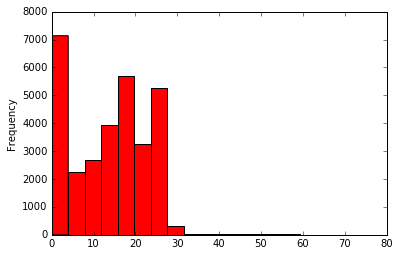

In [3]:
data['shot_distance'].plot.hist(bins=20, color='r')

In [16]:
x = train[list(filter(lambda c: c != 'shot_made_flag', train.columns))]
x = x[['lat', 'lon', 'minutes_remaining', 'playoffs']]
y = train['shot_made_flag']

In [17]:
x.describe()

,lat,lon,minutes_remaining,playoffs
count,25697.000000,25697.000000,25697.000000,25697.000000
mean,33.953043,-118.262652,4.886796,0.146243
std,0.088152,0.110073,3.452475,0.353356
min,33.253300,-118.519800,0.000000,0.000000
25%,33.884300,-118.336800,2.000000,0.000000
50%,33.970300,-118.269800,5.000000,0.000000
75%,34.040300,-118.175800,8.000000,0.000000
max,34.088300,-118.021800,11.000000,1.000000


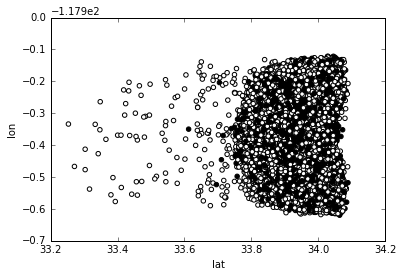

In [18]:
x.plot.scatter(x='lat', y='lon', c=y)

In [19]:
x.corr()

,lat,lon,minutes_remaining,playoffs
lat,1.000000,0.017578,0.077399,-0.000857
lon,0.017578,1.000000,0.006624,-0.007751
minutes_remaining,0.077399,0.006624,1.000000,0.009583
playoffs,-0.000857,-0.007751,0.009583,1.000000


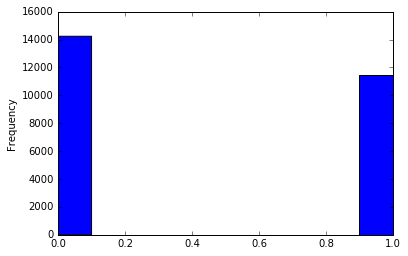

In [20]:
y.plot.hist()

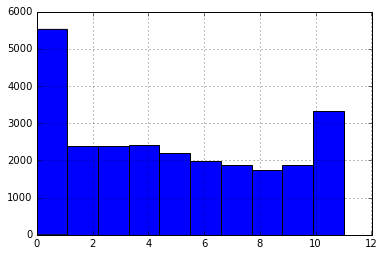

In [21]:
x['minutes_remaining'].hist()

In [25]:
# Try KNN
def remove_nans(data):
    data = data.dropna(axis=1, how='all')
    data = data.dropna(axis=0, how='any')
    for column_name in data.columns.values:
        try:
            data = data[np.isfinite(data[column_name])]
        except:
            pass
    return data

def process_strings(df):
    for i in range(len(df.columns)):
        if df.dtypes[i] == object:
            column = df.columns[i]
            df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
best_num = 1
best_score = 0
for num in range(1, 101, 2):
    model = KNeighborsClassifier(n_neighbors=num)
    score_cv = cross_validation.cross_val_score(model, remove_nans(process_strings(x)), y, cv=5)
    if score_cv.mean() > best_score:
        best_num = num
        best_score = score_cv.mean()
best_num, best_score

(93, 0.60361152944258567)

In [82]:
# output
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x, y)
test_data = test[x.columns]
test_data['shot_made_flag'] = model.predict(test_data)
res = test_data[['shot_made_flag']]
res.index += 1
res.to_csv('./data/kobe/res.csv', index_label='shot_id')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


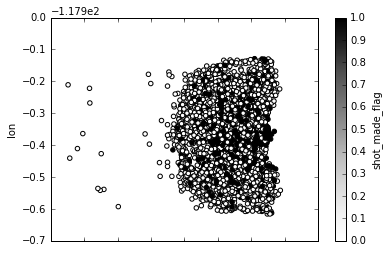

In [49]:
test_data.plot.scatter(x='lat', y='lon', c='shot_made_flag')

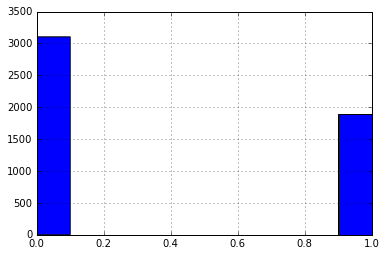

In [50]:
test_data['shot_made_flag'].hist()

In [89]:
from sklearn import preprocessing
from sklearn import ensemble
a = pd.Series([-0.5 ,0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.])
b = pd.Series([None, None, 10])
print(a)
print(preprocessing.MinMaxScaler().fit_transform(a.dropna()))
print(preprocessing.MaxAbsScaler().fit_transform(a.dropna()))
print(preprocessing.StandardScaler().fit_transform(a.dropna()))
print(preprocessing.Imputer(strategy='mean', axis=1).fit_transform(b.values))

0    -0.5
1     0.0
2     0.1
3     0.2
4     0.3
5     0.4
6     0.5
7     0.6
8     0.7
9     0.8
10    0.9
11    1.0
12    1.5
13    2.0
dtype: float64
[ 0.    0.2   0.24  0.28  0.32  0.36  0.4   0.44  0.48  0.52  0.56  0.6
  0.8   1.  ]
[-0.25  0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5
  0.75  1.  ]
[-1.81850244 -0.99724328 -0.83299144 -0.66873961 -0.50448777 -0.34023594
 -0.17598411 -0.01173227  0.15251956  0.31677139  0.48102323  0.64527506
  1.46653423  2.2877934 ]
[[ 10.  10.  10.]]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:778: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [87]:
model = ensemble.RandomForestClassifier(n_estimators=300)
model.fit(x, y)
test_data = test[x.columns]
test_data['shot_made_flag'] = model.predict(test_data)
res = test_data[['shot_made_flag']]
res.index += 1
res.to_csv('./data/kobe/res.csv', index_label='shot_id')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


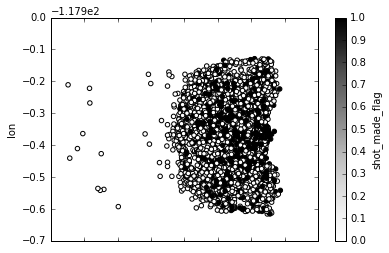

In [88]:
test_data.plot.scatter(x='lat', y='lon', c='shot_made_flag')